In [50]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [17]:
def show_rgb_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def show_gray_image(img):
    plt.imshow(img, cmap="gray")

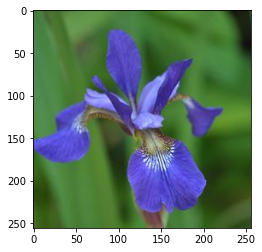

In [40]:
iris_setosa = cv2.imread('./archive/iris-setosa/iris-0c826b6f4648edf507e0cafdab53712bb6fd1f04dab453cee8db774a728dd640.jpg')
show_rgb_image(iris_setosa)

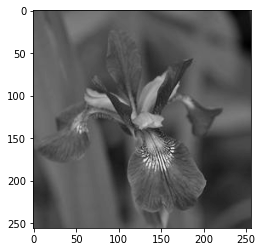

In [41]:
iris_setosa_gray = cv2.cvtColor(iris_setosa, cv2.COLOR_BGR2GRAY)
show_gray_image(iris_setosa_gray)

In [42]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None) ## kp is keypoint and desc is a 128-d array with features
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

In [43]:
kp, desc = gen_sift_features(iris_setosa_gray)

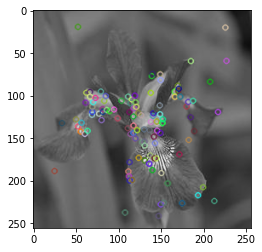

In [44]:
show_sift_features(iris_setosa_gray, iris_setosa, kp)

In [94]:
def gen_sift_features():
    arr = ["setosa", "versicolour", "virginica"]
    
    img_descs = []
    y = []
    for x in arr:
        # img_keypoints = {}
        
        files = glob(f"archive/iris-{x}/*.jpg")

        for i in files:
            img = cv2.imread(i)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            sift = cv2.xfeatures2d.SIFT_create()
            kp, desc = sift.detectAndCompute(gray, None)
            # img_keypoints[img_path] = kp
            print(desc.shape)
            img_descs.append(desc)
            y.append(x)

    y = np.array(y)

    return img_descs, y

In [95]:
img_descs, y = gen_sift_features()

(264, 128)
(281, 128)
(945, 128)
(985, 128)
(403, 128)
(298, 128)
(368, 128)
(377, 128)
(660, 128)
(834, 128)
(499, 128)
(607, 128)
(276, 128)
(828, 128)
(1027, 128)
(610, 128)
(399, 128)
(425, 128)
(371, 128)
(135, 128)
(1204, 128)
(903, 128)
(286, 128)
(588, 128)
(275, 128)
(1004, 128)
(162, 128)
(208, 128)
(273, 128)
(360, 128)
(336, 128)
(890, 128)
(325, 128)
(131, 128)
(176, 128)
(800, 128)
(1147, 128)
(339, 128)
(602, 128)
(158, 128)
(346, 128)
(466, 128)
(429, 128)
(474, 128)
(820, 128)
(343, 128)
(415, 128)
(242, 128)
(274, 128)
(319, 128)
(489, 128)
(772, 128)
(1181, 128)
(325, 128)
(393, 128)
(228, 128)
(913, 128)
(816, 128)
(1017, 128)
(250, 128)
(259, 128)
(312, 128)
(349, 128)
(709, 128)
(269, 128)
(251, 128)
(249, 128)
(183, 128)
(97, 128)
(524, 128)
(229, 128)
(552, 128)
(222, 128)
(161, 128)
(643, 128)
(159, 128)
(989, 128)
(202, 128)
(365, 128)
(297, 128)
(295, 128)
(647, 128)
(310, 128)
(311, 128)
(309, 128)
(317, 128)
(545, 128)
(355, 128)
(150, 128)
(181, 128)
(264,

In [109]:
pd.Series(y).value_counts(normalize=True)

versicolour    0.638955
virginica      0.201900
setosa         0.159145
dtype: float64

In [111]:
pd.Series(y).value_counts()

versicolour    269
virginica       85
setosa          67
dtype: int64

In [122]:
[y[:67], y[67:269+67], y[269+67:]]

[array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa'], dtype='<U11'),
 array(['versicolour', 'versicolour', 'versicolour', 'versicolour',
        'versicolour', 'versicolour', 'versicolour', 'versicolour',
        'versicolour', 'versicolour', 'versicolour', 'versicolour',
        'versi

In [138]:
def split_train_test(x, y):
    y = [y[:67], y[67:269+67], y[269+67:]]
    
    test_idxs = []
    for i in range(len(y)):
        total_rows = len(y[i])
        test = np.random.choice(range(total_rows), size=int(total_rows*0.25), replace=False)
        
        offset = [0,67, 67+269]
        test_idxs.extend(list(map(lambda x: x+offset[i], test)))
    
    training_idxs = [idx for idx in range(len(x)) if idx not in test_idxs]
    
    return training_idxs, sorted(test_idxs)

In [140]:
training_idxs, test_idxs = split_train_test(img_descs, y)

In [178]:
from sklearn.cluster import KMeans

def cluster_features(img_descs, training_idxs):
    kmeans = KMeans(n_clusters=750)
    n_clusters = kmeans.n_clusters
    
    training_descs = [img_descs[i] for i in training_idxs]
    all_train_descriptors = [desc for desc_list in training_descs for desc in desc_list]
    all_train_descriptors = np.array(all_train_descriptors)

    if all_train_descriptors.shape[1] != 128:
        raise ValueError('Expected SIFT descriptors to have 128 features, got', all_train_descriptors.shape[1])

    print(f"{all_train_descriptors.shape[0]} descriptors before clustering")

    # train kmeans or other cluster model on those descriptors selected above
    kmeans.fit(all_train_descriptors)

    # compute set of cluster-reduced words for each image
    img_clustered_words = [kmeans.predict(raw_words) for raw_words in img_descs]

    # finally make a histogram of clustered word counts for each image. These are the final features.
    img_bow_hist = np.array(
        [np.bincount(clustered_words, minlength=n_clusters) for clustered_words in img_clustered_words])

    X = img_bow_hist
        
    return X, kmeans

In [179]:
x, kmeans = cluster_features(img_descs, training_idxs)

135521 descriptors before clustering


In [182]:
def perform_data_split(X, y, training_idxs, test_idxs):
    X_train = X[training_idxs]
    X_test = X[test_idxs]

    y_train = y[training_idxs]
    y_test = y[test_idxs]

    return X_train, X_test, y_train, y_test

In [183]:
X_train, X_test, y_train, y_test = perform_data_split(x, y, training_idxs, test_idxs)

In [184]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

c_vals = [0.0001, 0.01, 0.1, 1, 5, 10, 100, 1000]

param_grid = [
  {'C': c_vals, 'kernel': ['linear']},
  {'C': c_vals, 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ]

svc = SVC(kernel="rbf", C = 1.0, gamma="auto")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6057692307692307